# Import Packages

In [87]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, cohen_kappa_score, confusion_matrix

# Import Data

In [88]:
df = pd.read_csv('credit_history.csv')

# Data Understanding 
- Missing Values
- Data Types
- Shape

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    7727 non-null   int64  
 1   amount     7727 non-null   int64  
 2   grade      7727 non-null   object 
 3   years      7448 non-null   float64
 4   ownership  7727 non-null   object 
 5   income     7727 non-null   float64
 6   age        7727 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 422.7+ KB


<AxesSubplot:>

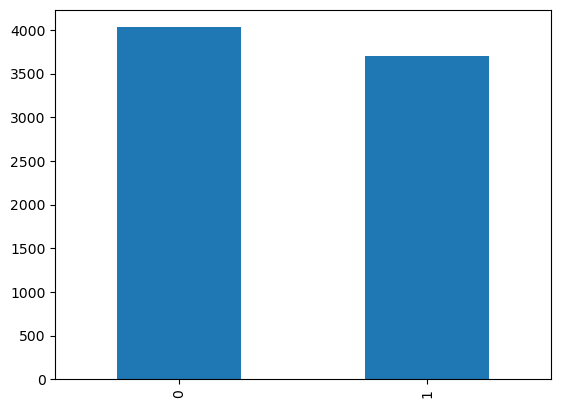

In [90]:
df['default'].value_counts().plot.bar()

# Idendify Numerical and Categorical features

In [91]:
numerical_features = df.drop(['default'], axis =1).select_dtypes(include = 'number').columns.tolist()
numerical_features

['amount', 'years', 'income', 'age']

In [92]:
categorical_features = df.drop(['default'], axis =1).select_dtypes(exclude = 'number').columns.tolist()
categorical_features

['grade', 'ownership']

# Partition into X and y

In [93]:
y = df['default']
X = df.drop(['default'], axis = 1)

# Split into Train Test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify = y)
# Stratify 

# Preprocessing
- Missing Value Treatment
- Outlier Treatment
- Numerical Tranformation
- Categorical Encoding
- ** Feature Selection, Dimentionality Reduction

# Numerical Treatment

In [95]:
X_train['years'] = X_train['years'].fillna(X_train['years'].median())
X_test['years'] = X_test['years'].fillna(X_test['years'].median())

In [96]:
# Instance
scaler = StandardScaler()

# Fit
scaler.fit(X_train[numerical_features])

# Transform
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<AxesSubplot:>

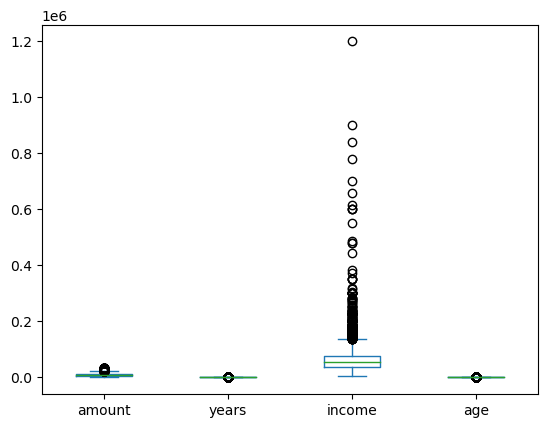

In [97]:
df[numerical_features].plot.box()

<AxesSubplot:>

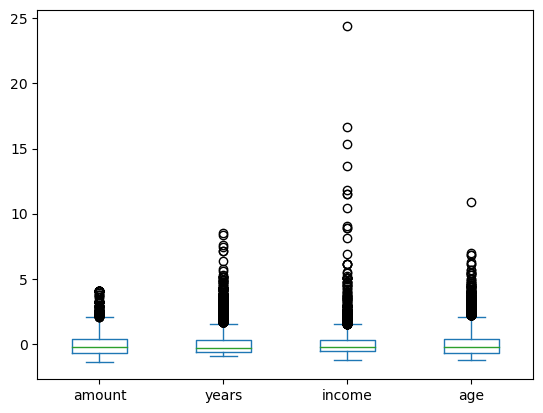

In [98]:
X_train[numerical_features].plot.box()

In [99]:
df.head(3)

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36


In [100]:
X_train.head(3)

,amount,grade,years,ownership,income,age
4940,-0.871113,C,-0.909059,RENT,-0.072012,-0.241285
1988,-0.237510,C,0.155846,MORTGAGE,0.769013,-0.568270
1393,1.663300,B,1.068621,MORTGAGE,2.329689,0.412686


# Categorical Treatment

In [101]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [102]:
X_test = pd.get_dummies(X_test, drop_first=True)

# Model

In [128]:
rf = RandomForestClassifier(random_state=42)

# Grid Search CV

In [138]:
# Import 
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid = { 'max_depth' : [8,9,10,11,12],
               'n_estimators' : [33,34,35,36,37]
             }

In [165]:
# Instance
gs = GridSearchCV(estimator = rf, param_grid = param_grid, verbose = 1, cv = 5)

In [166]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                              random_state=42),
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [33, 34, 35, 36, 37]},
             verbose=1)

In [167]:
gs.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=37, random_state=42)

# Predictions

In [168]:
y_pred_train_class = gs.predict(X_train)
y_pred_test_class = gs.predict(X_test)
y_pred_train_class

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [169]:
y_pred_train_proba = gs.predict_proba(X_train)[:,0]
y_pred_train_proba

array([0.41436832, 0.36102565, 0.72979287, ..., 0.374576  , 0.20198335,
       0.77742929])

# Performance Metrics

In [170]:
print(classification_report(y_train,y_pred_train_class))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      3224
           1       0.89      0.74      0.81      2957

    accuracy                           0.83      6181
   macro avg       0.84      0.83      0.83      6181
weighted avg       0.84      0.83      0.83      6181



In [171]:
print(classification_report(y_test,y_pred_test_class))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       806
           1       0.70      0.60      0.65       740

    accuracy                           0.68      1546
   macro avg       0.69      0.68      0.68      1546
weighted avg       0.69      0.68      0.68      1546



In [172]:
print(roc_auc_score(y_train,y_pred_train_class))
print(roc_auc_score(y_test,y_pred_test_class))

0.826348148943794
0.6816243042049493


In [173]:
print(cohen_kappa_score(y_train,y_pred_train_class))
print(cohen_kappa_score(y_test,y_pred_test_class))

0.6572429085477256
0.36528990553137963


In [155]:
confusion_matrix(y_train,y_pred_train_class)

array([[2750,  474],
       [ 880, 2077]], dtype=int64)

In [127]:
confusion_matrix(y_test,y_pred_test_class)

array([[625, 181],
       [362, 378]], dtype=int64)